In [1]:
pip install nbodysim --user

Note: you may need to restart the kernel to use updated packages.


## Example using nbodysim

Investigation of the angular momentum and conservation of energey, using the N-Body problem via numerical methods. In particular, we consider how an object's orbit behaves under perturbations to its velocity.

### How To Run a Simulation

To run a simulation, you simply need the `NBody` and a child class of `Integrator`.

1.    Instantiate `NBody`: this contains all the physical information of the simulation, such as the positions, velocities and masses of the bodies, alongside physical quantities (such as energy and angular momentum). Moreover, you can specify constants (`collision_tolerance` and `escape_tolerance`) that provide break points.
2.    Instantiate `Integrator`: this calculates the orbits of the NBody instance. I recommend using `Leapfrog3` as it is the most accurate and simple. It takes an `NBody` alongside other parameters, such as the time step, or whether to use an adaptive constant.
3.    Calculate Orbits: simply use the `get_orbits()` method of the `Integrator` instance
4.    Display Orbits: simply use the `show_orbits()` method. It can plot in 2D and 3D (both options animated), and also in grid-mode, by which it will display properties of the system over time.

Below is an example of what can be run:

In [ ]:
pip install nbodysim --user

Bodies: 2
Total Mass: 2
Centre of Mass: [0. 0. 0.]
Linear Momentum:
 [[ 0.4  0.   0. ]
 [-0.4  0.   0. ]]
Total Linear Momentum: [0. 0. 0.]
Angular Momentum:
 [[ 0.   0.  -0.4]
 [-0.  -0.  -0.4]]
Total Angular Momentum: [ 0.   0.  -0.8]
Kinetic Energy: 0.16000000000000003
Gravitational Potential Energy: -0.5
Total Energy: -0.33999999999999997

--------------------

Bodies: 2
Total Mass: 2
Centre of Mass: [0. 0. 0.]
Linear Momentum:
 [[ 0.13593791 -0.51027534  0.        ]
 [-0.13593791  0.51027534  0.        ]]
Total Linear Momentum: [0. 0. 0.]
Angular Momentum:
 [[ 0.   0.  -0.4]
 [-0.   0.  -0.4]]
Total Angular Momentum: [ 0.   0.  -0.8]
Kinetic Energy: 0.27886003434284173
Gravitational Potential Energy: -0.6188600694601704
Total Energy: -0.3400000351173286



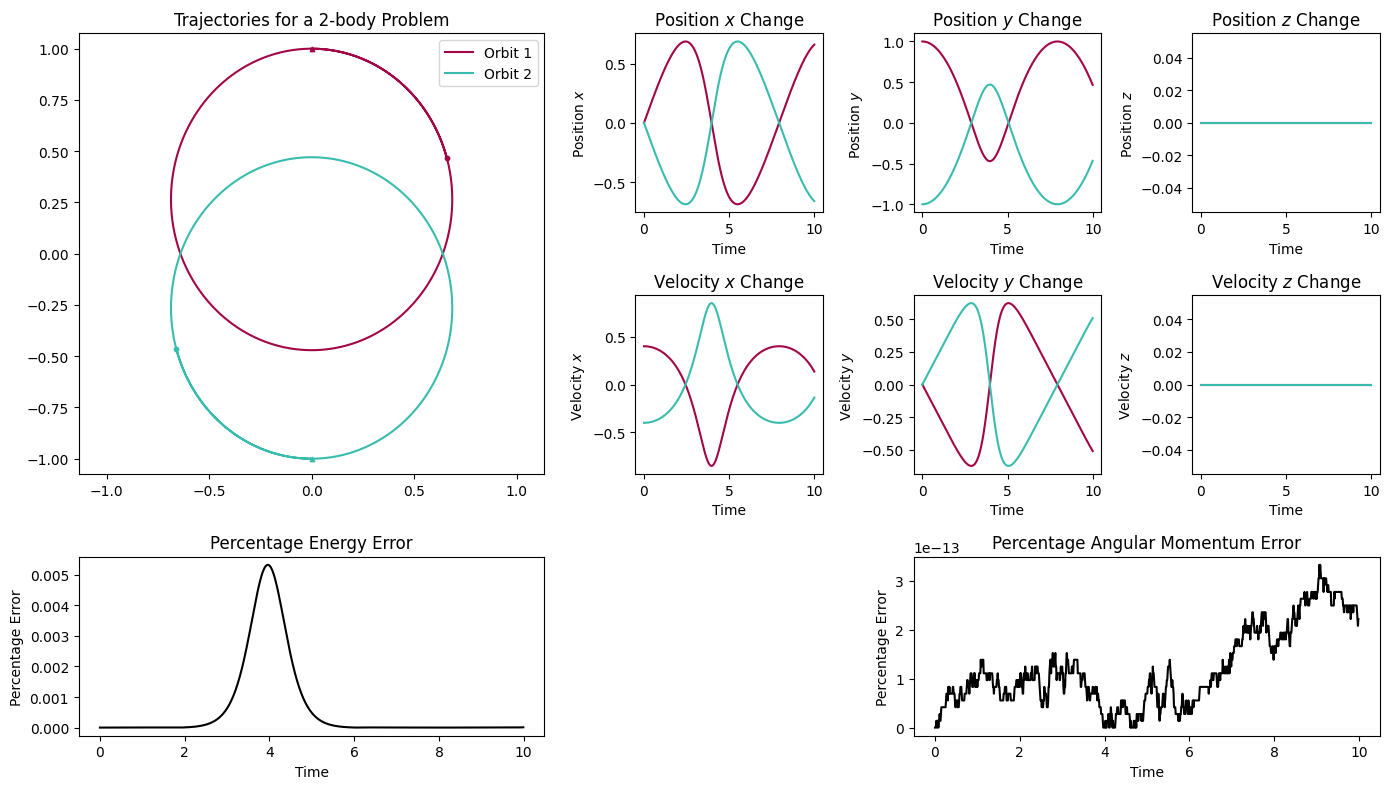

In [4]:
import numpy as np

from nbodysim.nbody import NBody
from nbodysim.integrators.leapfrog_3 import Leapfrog3

STEPS = 10**3
DELTA = 10**-2
TOLERANCE = 10**-3
ADAPTIVE_CONSTANT = 0.1
ADAPTIVE = False

init_positions = np.array([[0,1,0], [0,-1,0]])
init_velocities = np.array([[0.4,0,0], [-0.4,0,0]])
masses = np.array([1,1])

nbod = NBody(init_positions, init_velocities, masses)
nbod.G = 1

integ = Leapfrog3(nbod, steps = STEPS, delta = DELTA, tolerance = TOLERANCE, 
                  adaptive = ADAPTIVE, adaptive_constant = ADAPTIVE_CONSTANT, store_properties = True)

print(nbod)
print("-"*20 + "\n")
integ.get_orbits()
print(nbod)
integ.show_orbits(grid = True)

Checkthat energy is conserved. For the angular momentum to be constant, its first derivative must be zero. Using, Eq. 3.12, we find the first derivative is indeed zero.

In [24]:
r=np.array([[ 0.,   0.,  -0.4],
 [-0. , -0., -0.4]])

np.cross(r,r)

array([[0., 0., 0.],
       [0., 0., 0.]])

array([[0., 0., 0.],
       [0., 0., 0.]])